In [2]:
# pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('C:/Users/acer/Downloads/TCS_stock_history.csv')

In [8]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [9]:
df.shape

(4463, 8)

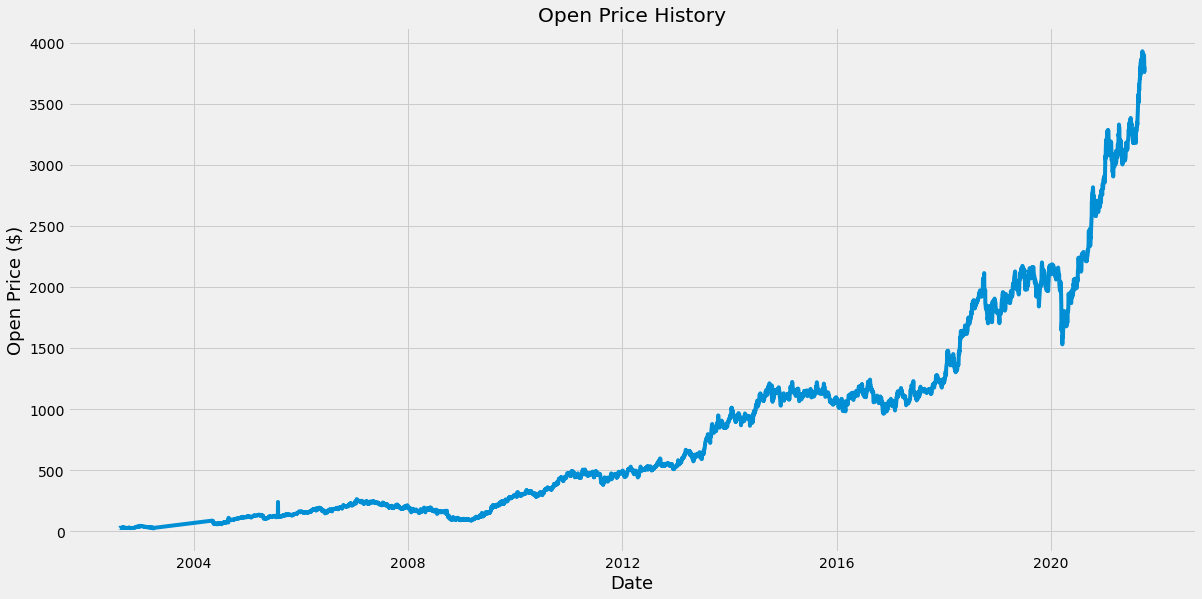

In [10]:
plt.figure(figsize=(18,9))
plt.title('Open Price History')

df["Date"] = pd.to_datetime(df["Date"])
date = df["Date"]

plt.plot(date,df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price ($)',fontsize=18)
plt.show()

In [11]:
data =  df.filter(['Open'])
#convert the dataframe to a numpy arrays
dataset = data.values
#get the number of rows to train the model
training_data_len = math.ceil( len(dataset) * .8)
training_data_len

3571

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00118981],
       [0.00138494],
       [0.00128976],
       ...,
       [0.97951792],
       [0.95642438],
       [0.96799675]])

In [13]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00118981, 0.00138494, 0.00128976, 0.0007591 , 0.00072341,
       0.00079955, 0.0006187 , 0.00114222, 0.00133973, 0.00148012,
       0.00199888, 0.00190846, 0.00161815, 0.00160149, 0.00167287,
       0.00233678, 0.00233679, 0.00178947, 0.00232013, 0.00205123,
       0.00133735, 0.00161101, 0.00165384, 0.00190607, 0.00156817,
       0.00169429, 0.00160624, 0.0016467 , 0.00138494, 0.00111366,
       0.00131356, 0.0011089 , 0.00072341, 0.00108987, 0.00103038,
       0.00103038, 0.00090902, 0.00081621, 0.00090902, 0.00109939,
       0.00100658, 0.00094947, 0.00114697, 0.00114698, 0.00114222,
       0.00122788, 0.00103989, 0.00196081, 0.00109938, 0.00119457,
       0.00138018, 0.00138494, 0.00109939, 0.00109463, 0.00076624,
       0.00069485, 0.00062346, 0.00076624, 0.00086142, 0.00096137])]
[0.0009566087067930376]

[array([0.00118981, 0.00138494, 0.00128976, 0.0007591 , 0.00072341,
       0.00079955, 0.0006187 , 0.00114222, 0.00133973, 0.00148012,
       0.00199888, 0.00190846, 0.

In [14]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train.shape

(3511, 60)

In [16]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] ,1))
x_train.shape

(3511, 60, 1)

In [17]:
#Build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3511/3511 [==============================] - 310s 83ms/step - loss: 1.4257e-04


In [21]:
#creating the testing data
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets x_train and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [22]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

28/28 [==============================] - 5s 58ms/step


In [25]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

66.15488513054245

C:\Users\acer\AppData\Local\Temp\ipykernel_7964\3603618858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


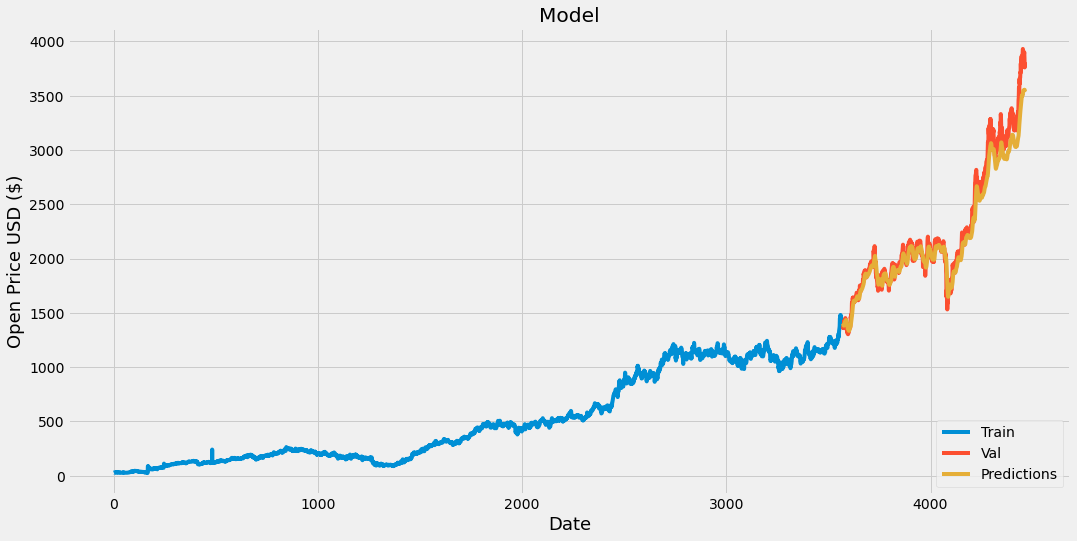

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'])
plt.plot(valid[['Open','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [27]:
valid

,Open,Predictions
3571,1363.293454,1401.342773
3572,1359.131998,1394.729980
3573,1369.361750,1388.589233
3574,1361.457093,1384.812622
3575,1382.845952,1381.737183
...,...,...
4458,3890.000000,3545.462891
4459,3900.000000,3548.962402
4460,3850.000000,3554.482178
4461,3759.800049,3553.268066


## Hence, We explored Stock Price of TCS using LSTM. We then visualized closing price value after using LSTM.